In [1]:
# Larger CNN for the MNIST Dataset
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils


In [2]:
# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()


In [3]:
# reshape to be [samples][width][height][channels]
X_train = X_train.reshape((X_train.shape[0], 28, 28, 1)).astype('float32')
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1)).astype('float32')


In [4]:
X_train.shape
X_test.shape

(10000, 28, 28, 1)

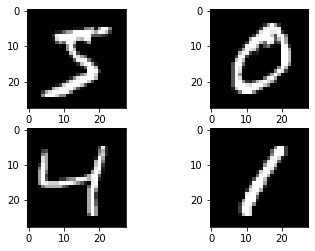

In [5]:
plt.subplot(221)
plt.imshow(X_train[0], cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(X_train[1], cmap=plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(X_train[2], cmap=plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(X_train[3], cmap=plt.get_cmap('gray'))
# show the plot
plt.show()

In [6]:
y_train[:4]

array([5, 0, 4, 1], dtype=uint8)

In [7]:
# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255


In [8]:
# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]


In [9]:
# create model
model = Sequential()
model.add(Conv2D(30, (5, 5), input_shape=(28, 28, 1), activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(15, (3, 3), activation='relu'))
model.add(MaxPooling2D())
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))


In [10]:
# Compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [11]:
# Fit the model
model_history=model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200)


Epoch 1/10
300/300 [==============================] - 17s 55ms/step - loss: 0.8544 - accuracy: 0.7161 - val_loss: 0.0751 - val_accuracy: 0.9775
Epoch 2/10
300/300 [==============================] - 16s 54ms/step - loss: 0.1064 - accuracy: 0.9666 - val_loss: 0.0504 - val_accuracy: 0.9832
Epoch 3/10
300/300 [==============================] - 16s 55ms/step - loss: 0.0769 - accuracy: 0.9757 - val_loss: 0.0410 - val_accuracy: 0.9870
Epoch 4/10
300/300 [==============================] - 16s 53ms/step - loss: 0.0579 - accuracy: 0.9821 - val_loss: 0.0379 - val_accuracy: 0.9878
Epoch 5/10
300/300 [==============================] - 16s 54ms/step - loss: 0.0494 - accuracy: 0.9842 - val_loss: 0.0300 - val_accuracy: 0.9896
Epoch 6/10
300/300 [==============================] - 16s 54ms/step - loss: 0.0428 - accuracy: 0.9863 - val_loss: 0.0331 - val_accuracy: 0.9880
Epoch 7/10
300/300 [==============================] - 16s 54ms/step - loss: 0.0389 - accuracy: 0.9871 - val_loss: 0.0292 - val_accuracy:

In [12]:
model.save('Model/model.h5')

In [13]:
model = keras.models.load_model('Model/model.h5')

In [14]:
model_history.params

{'verbose': 1, 'epochs': 10, 'steps': 300}

In [15]:
model_history.history

{'loss': [0.3906930983066559,
  0.0962003692984581,
  0.0726802870631218,
  0.056430887430906296,
  0.048868123441934586,
  0.04425162076950073,
  0.03772105649113655,
  0.03480159491300583,
  0.0334259457886219,
  0.03139522671699524],
 'accuracy': [0.8752833604812622,
  0.9698166847229004,
  0.9771999716758728,
  0.9825166463851929,
  0.984499990940094,
  0.9861833453178406,
  0.9878166913986206,
  0.9885500073432922,
  0.9890166521072388,
  0.9895666837692261],
 'val_loss': [0.07505365461111069,
  0.05043815076351166,
  0.04100572317838669,
  0.03790677338838577,
  0.02998071350157261,
  0.033111732453107834,
  0.02922508865594864,
  0.029850009828805923,
  0.025348326191306114,
  0.022888170555233955],
 'val_accuracy': [0.9775000214576721,
  0.9832000136375427,
  0.9869999885559082,
  0.9878000020980835,
  0.9896000027656555,
  0.9879999756813049,
  0.9894000291824341,
  0.9900000095367432,
  0.9909999966621399,
  0.9919999837875366]}

[]

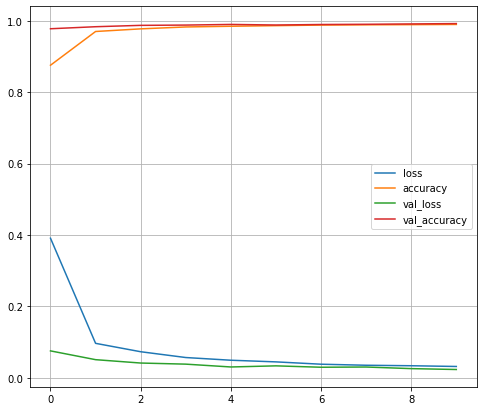

In [16]:
import pandas as pd

pd.DataFrame(model_history.history).plot(figsize=(8,7))
plt.grid()
plt.plot()

In [17]:
model.evaluate(X_test,y_test, verbose=1)

313/313 [==============================] - 1s 4ms/step - loss: 0.0229 - accuracy: 0.9920


[0.022888166829943657, 0.9919999837875366]